# Tutorial 3 - More about data analysis

## Correlation of time series signal.

So last time we see the correlation function, but that function only return a single correlation between two vectors. so what do we do if we want to plot correlation versus time?

Remember spectrogram which shows the frequency versus time? To have that, we use a window of data, do Fourier transform on that window, then move the window along the whole data. Here we do the same thing. We use the correlation function to find the correlation between two windows, giving us 1 data point. Then we move on to the next window, giving us the next data point, etc. In the end, we have a lot of data point and we connect them together to form a graph (see Figure 1). Same as in spectrogram, the important parameters here is the width of the window. The bigger the window, the better the accuracy, but the worse time resolution.

<img src="correlation.png" width=750> <p>
<a id='fig1'><center> Figure 1.1 </center></a>

### Now let's go into the code

In [1]:
# Import the libraries
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np

C:\Users\Bubble\Anaconda3\lib\site-packages\ipykernel_launcher.py:6: DeprecationWarning: object of type <class 'float'> cannot be safely interpreted as an integer.
  


Text(0.5,1,'Original signal')

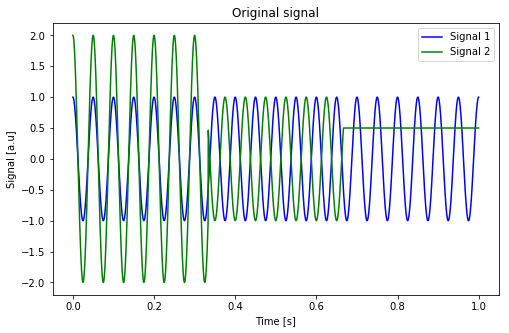

In [2]:
# Input parameters
f = 20   # signal frequency
Fs = 2e3   # sampling rate
t_final = 1   # duration of the signal
A = 1   # amplitude
t = np.linspace(0,t_final,t_final*Fs)   # vector time

# Now let's generate two signals
signal_1 = A*np.cos(2*np.pi*f*t)
signal_2 = np.zeros(len(signal_1))  # Create a vector full of zeros with the same length as signal_1
for i in range(len(t)):
    if (t[i] < t_final/3):
        signal_2[i] = 2*A*np.cos(2*np.pi*f*t[i])
    elif (t[i] < 2*t_final/3):
        signal_2[i] = A*np.cos(2*np.pi*f*t[i]+np.pi)
    else:
        signal_2[i] = 0.5
            
        
# Plot the signal:
fig = plt.figure(figsize=(8,5))
plt.plot(t, signal_1, color='blue', label = 'Signal 1')
plt.plot(t, signal_2, color = 'green', label = 'Signal 2')
plt.xlabel('Time [s]')
plt.ylabel('Signal [a.u]')
plt.legend(loc='best')
plt.title('Original signal')

As you can see, the first part of signal 2 has high correlation with signal 1, the second part has negative correlation and the final part is not correlated. Now to make the data looks more real, we add some noise to it

Text(0.5,1,'Signal with noise')

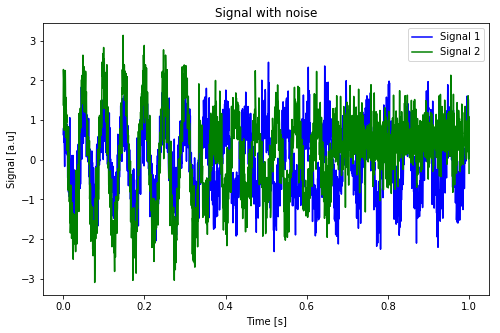

In [3]:
mean = 0 # White noise mean
std = 0.5 # White noise standard deviation
N_WN = len(signal_1) # number of points 

noise_1 = np.random.normal(mean, std, size=N_WN)
noise_2 = np.random.normal(mean, std, size=N_WN)

# Add noise to the signal:
signal_1_noise = signal_1 + noise_1
signal_2_noise = signal_2 + noise_2

# Plot the signal:
fig = plt.figure(figsize=(8,5))
plt.plot(t, signal_1_noise, color='blue', label = 'Signal 1')
plt.plot(t, signal_2_noise, color = 'green', label = 'Signal 2')
plt.xlabel('Time [s]')
plt.ylabel('Signal [a.u]')
plt.legend(loc='best')
plt.title('Signal with noise')

Good, now let's plot the correlation function

Text(0.5,1,'Correlation between signal 1 and signal 2')

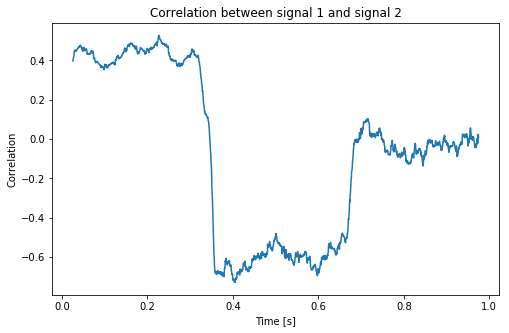

In [6]:
def find_correlation(signal1, signal2, d):
    # This function takes 3 parameters: the two signal and the width of the windows and return the correlation
    n = int(len(signal1) - d)   # the number of windows
    corr = np.zeros(n)   # vector to store the correlation
    
    for i in range(n): #   Loop through all the windows
        norm = np.max([np.sum(signal1[i:i+d]**2), np.sum(signal2[i:i+d]**2)])
        corr[i] = np.correlate(signal1[i:i+d], signal2[i:i+d])/norm
        
    return corr

n = len(signal_1_noise)-d
d = 100   # width of the window
corr = find_correlation(signal_1_noise, signal_2_noise, d)

plt.figure(figsize=(8,5))
plt.plot(t[int(d/2):int(d/2)+n], corr)
plt.xlabel('Time [s]')
plt.ylabel('Correlation')
plt.title('Correlation between signal 1 and signal 2')

### Question 1 ###

Try the code about but with signal without noise. What do you see?

Try plotting the correlation with d = 10, 100, 1000. What is the difference? And why?

In [ ]:
### Your code here

## Play around with the sound

As an example, I made a hand clap and record the sound with my cell phone, which gives a file in .aac format. The next step is converted it into .wav (google it!) then now as the file is ready, let's import and play around with it.

Sampling rate: 48000.000000
Number of data point: 179040.000000
Recorded time: 3.730000
Dimension of signal: (179040, 2)


Text(0.5,1,'Channel 2')

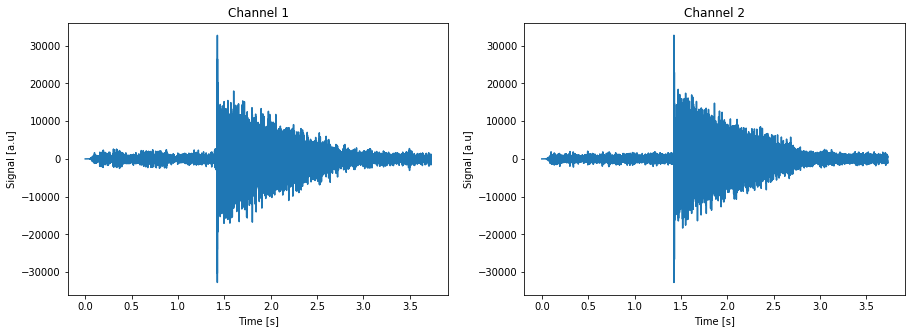

In [7]:
import scipy.io.wavfile

fs, data = scipy.io.wavfile.read('Hand_clap.wav')

print('Sampling rate: %f' %fs)
print('Number of data point: %f' %(len(data)))
print('Recorded time: %f' %(len(data)/fs))
print('Dimension of signal: ' + str(data.shape))

# Plotting the data:

time = np.arange(0,len(data[:,0]),1)/fs

fig1 = plt.figure(figsize=(15,5))
ax1 = fig1.add_subplot(121)
plt.plot(time, data[:,0])
plt.xlabel('Time [s]')
plt.ylabel('Signal [a.u]')
plt.title('Channel 1')

ax2 = fig1.add_subplot(122)
plt.plot(time, data[:,1])
plt.xlabel('Time [s]')
plt.ylabel('Signal [a.u]')
plt.title('Channel 2')


### Question 2 ###

So the sampling rate is 48000 Hz and the recorded time is 3.73 seconds, that's easy to understand. But then, my signal consists of two channel, which looks quite similar. Why?

Will the channel 1 and channel 2 has high correlation? Why? Try plotting the correlation curve and see for yourself

In [63]:
### Your code here

Now let's take a closer look at the signal at two different time

(-14000.0, 14000.0)

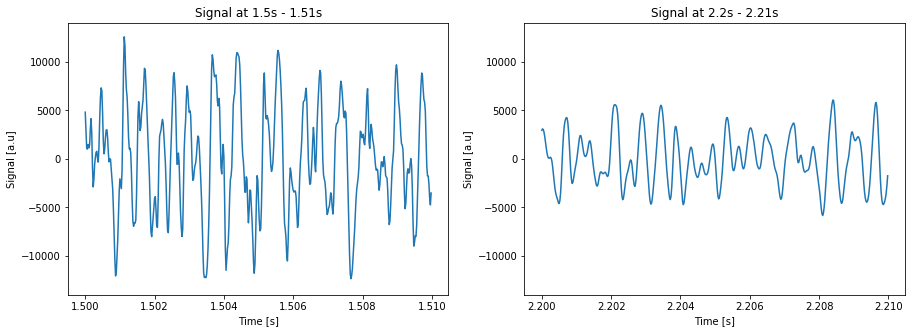

In [8]:
fig2 = plt.figure(figsize=(15,5))

ax1 = fig2.add_subplot(121)
t_start, t_end = 1.5, 1.51
i_start, i_end = int(t_start*fs), int(t_end*fs)
plt.plot(time[i_start:i_end], data[i_start:i_end,0])
plt.xlabel('Time [s]')
plt.ylabel('Signal [a.u]')
plt.title('Signal at 1.5s - 1.51s')
plt.ylim(-14e3, 14e3)

ax2 = fig2.add_subplot(122)
t_start, t_end = 2.2, 2.21
i_start, i_end = int(t_start*fs), int(t_end*fs)
plt.plot(time[i_start:i_end], data[i_start:i_end,0])
plt.xlabel('Time [s]')
plt.ylabel('Signal [a.u]')
plt.title('Signal at 2.2s - 2.21s')
plt.ylim(-14e3, 14e3)

### Question 3

What do you see in the signal strength? Frequency? Why do you see such features? Try plotting the spectrogram of the full signal

In [ ]:
## Your code here

### Question 4

Try to find the length of the clap and estimate the size of the room that I was standing in using that information.

In [9]:
## Your code here